Train a deep learning model to classify beetles, cockroaches and dragonflies using these [images](https://www.dropbox.com/s/fn73sj2e6c9rhf6/insects.zip?dl=0). Note: Original images from https://www.insectimages.org/index.cfm. Blog about this, and *explain* how the neural network classified the images using [SHapley Additive exPlanations](https://github.com/slundberg/shap).

In [1]:
import pandas as pd 
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten,Dense
from sklearn import metrics

In [2]:
train_directory = "insects/train"
test_directory = "insects/test"
categories = ["beetles", "cockroach", "dragonflies"]

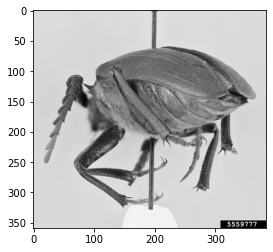

In [3]:
path = os.path.join(train_directory, categories[0])
for img in os.listdir(path):  # Iterate over every image
    img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE) # Convert to array
    plt.imshow(img_array, cmap='gray')
    plt.show()
    # Check to see one image
    break

## Data Creation

In [4]:
training_data = []
testing_data = []

In [5]:
imag_size = 200
standardize = 255

In [10]:
## training data and label creation
for category in categories:
    # path to folder that contains the picture
    path = os.path.join(train_directory, category)
    for img in os.listdir(path):  # Iterate over every image
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE) # Convert to array
        label = categories.index(category) # Give label: beetles=0, cockroach=1, dragonflies = 2
        resized_img = cv2.resize(img_array, (imag_size, imag_size))
        standardized = np.divide(resized_img, standardize)
        training_data.append([(standardized), label])

In [11]:
training_data[0][0]

array([[0.85882353, 0.85882353, 0.85882353, ..., 0.8627451 , 0.8627451 ,
        0.8627451 ],
       [0.85882353, 0.85882353, 0.85882353, ..., 0.85882353, 0.8627451 ,
        0.8627451 ],
       [0.85882353, 0.85882353, 0.85882353, ..., 0.8627451 , 0.85882353,
        0.8627451 ],
       ...,
       [0.84705882, 0.84705882, 0.84705882, ..., 0.        , 0.        ,
        0.        ],
       [0.84705882, 0.84705882, 0.84705882, ..., 0.        , 0.        ,
        0.        ],
       [0.84705882, 0.84705882, 0.84705882, ..., 0.        , 0.        ,
        0.        ]])

In [6]:
## testing data and label creation
for category in categories:
    path = os.path.join(test_directory, category)
    for img in os.listdir(path):  # Iterate over every image
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE) # Convert to array
        label = categories.index(category) # Give label: beetles=0, cockroach=1, dragonflies = 2
        resized_img = cv2.resize(img_array, (imag_size, imag_size))
        standardized = np.divide(resized_img, standardize)
        testing_data.append([(standardized), label])

In [13]:
len(testing_data)

180

In [12]:
len(training_data)

1019

In [14]:
# training data and training label
X_train = [i[0] for i in training_data]
y_train = [i[1] for i in training_data]

In [15]:
X_train = np.array(X_train)

In [16]:
X_train.shape

(1019, 200, 200)

In [17]:
X_train =  np.expand_dims(X_train, axis=-1)

In [18]:
y_train = np.array(y_train)

In [19]:
y_train.shape

(1019,)

In [20]:
X_train.shape

(1019, 200, 200, 1)

In [21]:
# test data and test lable
X_test = [i[0] for i in testing_data]
y_test = [i[1] for i in testing_data]

In [22]:
X_test = np.array(X_test)

In [23]:
X_test = np.expand_dims(X_test, axis=-1)

In [24]:
X_test.shape

(180, 200, 200, 1)

In [27]:
y_test = np.array(y_test)

In [28]:
y_test.shape

(180,)

## Model & Training

In [30]:
num_classes = 3
shape = (200,200,1)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

2021-11-14 15:25:11.597515: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [31]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [32]:
X_train.shape

(1019, 200, 200, 1)

In [33]:
y_train.shape

(1019,)

In [34]:
X_test.shape

(180, 200, 200, 1)

In [35]:
model.fit(X_train, y_train, epochs=3, verbose=1)

2021-11-14 15:25:18.336096: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/3
32/32 [==============================] - 56s 2s/step - loss: 3.6103 - accuracy: 0.5908
Epoch 2/3
32/32 [==============================] - 54s 2s/step - loss: 0.3589 - accuracy: 0.8695
Epoch 3/3
32/32 [==============================] - 53s 2s/step - loss: 0.1367 - accuracy: 0.9637


## Test & Evaluation

In [36]:
predictions = model.predict(X_test)
score = tf.nn.softmax(predictions)

In [37]:
pred_class = np.argmax(predictions, axis=1) 

In [40]:
print(f"Model accruracy is : {metrics.accuracy_score(y_test, pred_class)}")

Model accruracy is : 0.9777777777777777


In [41]:
print(f"Model precision is : {metrics.precision_score(y_test, pred_class, average = 'weighted')}")

Model precision is : 0.9781238413051538


In [42]:
print(f"Model recall is : {metrics.recall_score(y_test, pred_class,  average = 'weighted')}")

Model recall is : 0.9777777777777777


In [43]:
print(f"Model F1 is : {metrics.f1_score(y_test, pred_class,  average = 'weighted')}")

Model F1 is : 0.9777716032231175


In [44]:
metrics.confusion_matrix(y_test, pred_class)

array([[60,  0,  0],
       [ 0, 59,  1],
       [ 0,  3, 57]])

In [ ]:
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()

## SHAP interpretation

In [52]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2])

In [45]:
import shap

In [46]:
explainer = shap.GradientExplainer(model, X_train)

In [64]:
# select one graph from each class
sv = explainer.shap_values(X_test[[0,67,141]])

In [65]:
sv[0].shape

(3, 200, 200, 1)

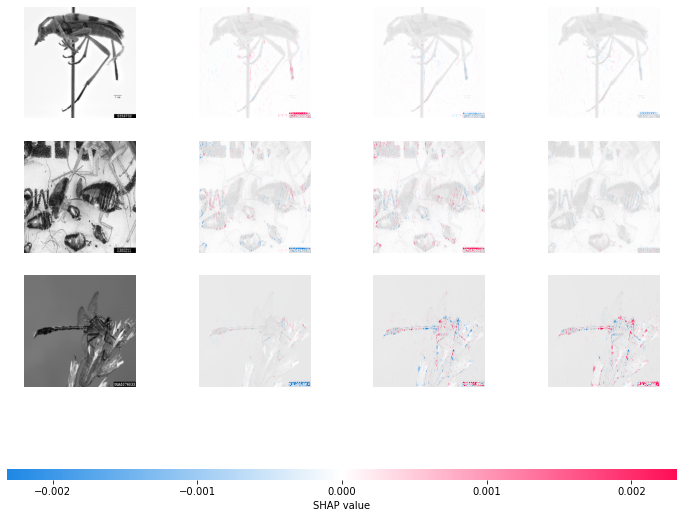

In [66]:
# compare the model explains the model output for three images coming from each class respectively
# Red pixels increase the model's output while blue pixels decrease the output. 
shap.image_plot([sv[i] for i in range(3)], X_test[[0,67,141]])